In [27]:
# import the libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


<h1>Create windows and extract features for training and testing data<h1>

In [5]:
def extract_features(data):
    '''Function to extract features from the data set'''
    size = len(data)
    parts = ['L_heel_','L_ball_','R_heel_','R_ball_']
    rows = []
    for i in range(0,size-30): # window size of 30 seconds overlapping one another
        current = data.iloc[i:i+30,:]
        # calculate features for window
        features = {}
    
        for p in parts:
        
            features[p+'temp_mean'] = current[p+'temp'].mean()
            features[p+'temp_std'] = current[p+'temp'].std()
            features[p+'pressure_mean'] = current[p+'pressure'].mean()
            features[p+'pressure_std'] = current[p+'pressure'].std()
            features[p+'risk'] = current[p+'risk'].mode()[0]
        
        
        features['CrossFootDifference_temp_heel'] = ((current['L_heel_temp'] - current['R_heel_temp']).mean())
        features['CrossFootDifference_temp_ball'] = ((current['L_ball_temp'] - current['R_ball_temp']).mean())
        features['CrossFootDifference_pressure_heel'] = ((current['L_heel_pressure'] - current['R_heel_pressure']).mean())
        features['CrossFootDifference_pressure_ball'] = ((current['L_ball_pressure'] - current['R_ball_pressure']).mean())

        rows.append(features)

    features_df = pd.DataFrame(rows)
    return features_df

In [6]:
# get the training data and testing data
training_data_csv = pd.read_csv('simulated_data_training.csv')
training_data = extract_features(training_data_csv)
testing_data_csv = pd.read_csv('simulated_data_testing.csv')
testing_data = extract_features(testing_data_csv)

<h1> Setting Up the model <h1>

In [ ]:
# get the columns for fetures and labels from the dataset

feature_cols=[col for col in training_data.columns if 'mean' in col or 'std' in col or 'CrossFootDifference' in col]

X_train = training_data[feature_cols]
X_test = testing_data[feature_cols]

label_cols = [col for col in training_data.columns if 'risk' in col]

Y_train = training_data[label_cols]
Y_test = testing_data[label_cols]



,L_heel_temp_mean,L_heel_temp_std,L_heel_pressure_mean,L_heel_pressure_std,L_ball_temp_mean,L_ball_temp_std,L_ball_pressure_mean,L_ball_pressure_std,R_heel_temp_mean,R_heel_temp_std,R_heel_pressure_mean,R_heel_pressure_std,R_ball_temp_mean,R_ball_temp_std,R_ball_pressure_mean,R_ball_pressure_std,CrossFootDifference_temp_heel,CrossFootDifference_temp_ball,CrossFootDifference_pressure_heel,CrossFootDifference_pressure_ball
0,34.959163,0.107025,750.296765,251.778507,34.958830,0.113188,750.849652,251.432361,34.972588,0.100734,746.643801,248.509245,34.980008,0.097030,746.593709,249.566000,-0.013426,-0.021178,3.652963,4.255943
1,34.957007,0.107213,750.467545,251.959657,34.952053,0.112496,751.261167,251.871119,34.988971,0.106574,747.752675,247.372160,34.994980,0.104593,747.881950,248.271604,-0.031963,-0.042927,2.714870,3.379217
2,34.958672,0.107814,748.715513,253.808406,34.955524,0.114645,749.531193,253.684532,34.994242,0.099055,747.327424,246.893175,35.001319,0.098077,747.602530,247.955809,-0.035570,-0.045795,1.388090,1.928663
3,34.963014,0.107691,748.026040,253.136084,34.964240,0.112469,748.730157,252.912348,34.996830,0.094693,747.636635,246.580957,35.000474,0.099286,747.899078,247.654771,-0.033817,-0.036235,0.389405,0.831079
4,34.964880,0.111241,748.340661,252.824688,34.963070,0.110433,748.982296,252.656692,35.006059,0.095309,747.981087,246.970856,35.009558,0.099453,748.097348,247.879962,-0.041179,-0.046488,0.359574,0.884947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,33.990720,0.100992,948.434686,16.284533,33.987519,0.109039,947.902142,16.361783,36.171613,0.111823,1023.000000,0.000000,33.976956,0.105509,1023.000000,0.000000,-2.180893,0.010563,-74.565314,-75.097858
2666,33.978910,0.097745,947.321921,15.354938,33.977430,0.110976,946.879663,15.561571,36.176195,0.107923,1023.000000,0.000000,33.983329,0.099956,1023.000000,0.000000,-2.197285,-0.005899,-75.678079,-76.120337
2667,33.980304,0.097639,946.720412,15.331549,33.981971,0.109271,946.496244,15.541411,36.174594,0.108825,1022.588600,2.253332,33.982852,0.099973,1022.338205,3.624798,-2.194290,-0.000882,-75.868188,-75.841962
2668,33.976928,0.099161,946.611562,15.369086,33.980358,0.109068,946.345628,15.583725,36.183353,0.115767,1022.588600,2.253332,33.989190,0.103259,1022.338205,3.624798,-2.206425,-0.008832,-75.977038,-75.992577


In [8]:
# Set up random Forest

rf = RandomForestClassifier(n_estimators=100,random_state=42)
multi_rf = MultiOutputClassifier(rf) # allows for multiple classifications at once

multi_rf.fit(X_train,Y_train)


,estimator,RandomForestC...ndom_state=42)
,n_jobs,None
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0


In [28]:
Y_pred = multi_rf.predict(X_test)


<h1>Results<h1>

In [ ]:
for i, col in enumerate(label_cols):
    print(f"--- {col} ---")
    print(classification_report(Y_test[col], Y_pred[:, i]))
    

--- L_heel_risk ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2154
         1.0       0.85      0.70      0.77       226
         2.0       0.91      0.67      0.77       107
         3.0       0.58      0.75      0.65       118
         4.0       0.64      0.89      0.74        65

    accuracy                           0.95      2670
   macro avg       0.79      0.80      0.79      2670
weighted avg       0.95      0.95      0.95      2670

[[2153    0    0    1    0]
 [   3  159    0   64    0]
 [   2    0   72    0   33]
 [   0   29    0   89    0]
 [   0    0    7    0   58]]
--- L_ball_risk ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2158
         1.0       0.70      0.93      0.80       216
         2.0       0.75      0.49      0.59        96
         3.0       0.71      0.34      0.46       125
         4.0       0.55      0.81      0.66        75

    

--- L_heel_risk ---


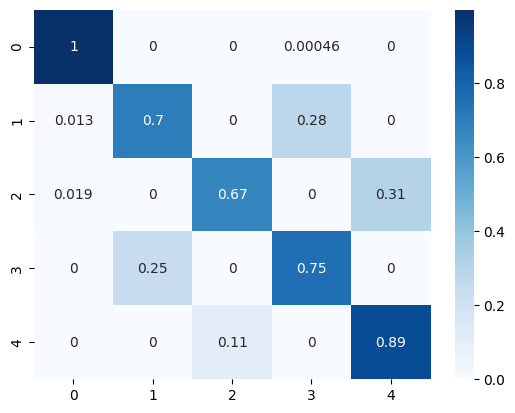

--- L_ball_risk ---


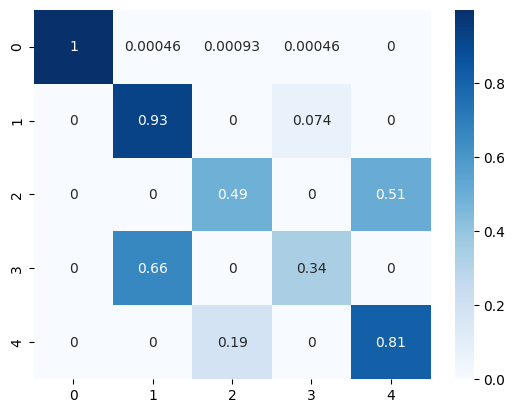

--- R_heel_risk ---


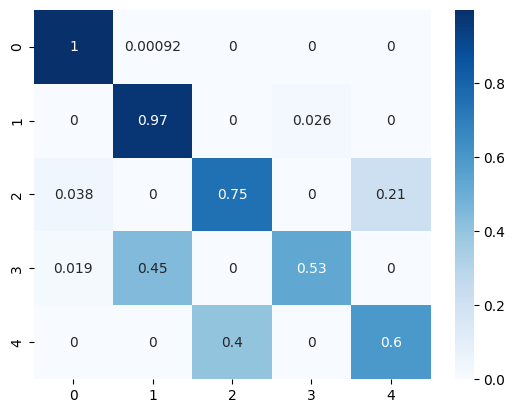

--- R_ball_risk ---


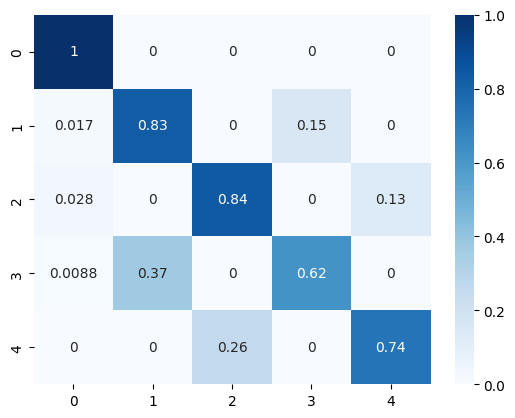

In [ ]:
# confusion matrix to see results
for i,col in enumerate(label_cols):
    print(f"--- {col} ---")
    cm = confusion_matrix(Y_test[col], Y_pred[:, i])
    cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #reshape so teh divison works
    sns.heatmap(cm_normalised, annot=True, cmap='Blues',xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
    plt.show()


    
    

In [30]:
# store the model
joblib.dump(multi_rf,"risk_model.pkl")


['risk_model.pkl']